## Market Basket Analysis - Online Retail

### About Dateset

- This is a transnational data set that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Most customers of the company are wholesalers.

### Data Source

- https://archive.ics.uci.edu/dataset/352/online+retail

### Attribute Information

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.	

- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

- UnitPrice: Unit price. Numeric, Product price per unit in sterling.

- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal, the name of the country where each customer resides. 

### Installing and Importing Required Libraries

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [4]:
# reading dataset
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# knowing its shape
df.shape

(541909, 8)

In [6]:
# getting its basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Data Cleaning

In [7]:
# chceking for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

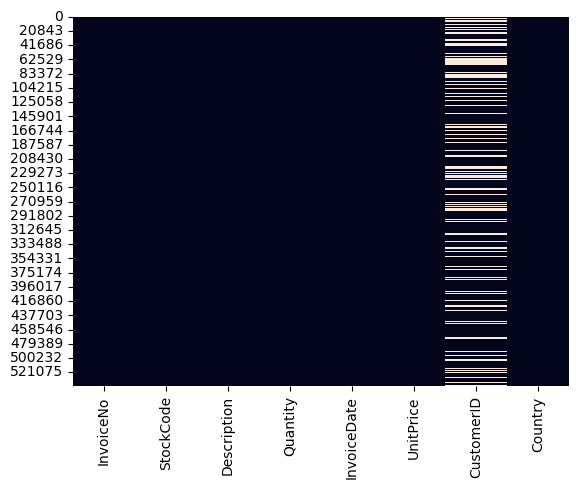

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [9]:
# droppping CustomerID
df.drop('CustomerID', axis= 1, inplace= True)

In [10]:
# dropping null values
df.dropna(axis= 0, inplace= True)

In [11]:
# describing the dataset
df.describe(include= 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
count,540455.0,540455,540455,540455.000000,540455,540455.000000,540455
unique,24446.0,3958,4223,NaN,22309,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,494024
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN
mean,NaN,NaN,NaN,9.603129,NaN,4.623519,NaN
std,NaN,NaN,NaN,218.007598,NaN,96.889628,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN


In [12]:
# checking for duplicates
df.duplicated().sum()

5268

In [13]:
# dropping duplicates
df.drop_duplicates(inplace= True)

In [14]:
# checking number of cancelled orders
df['InvoiceNo'].str.contains('C').sum()

9251

In [15]:
# getting datas other than cancelled orders
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [16]:
# removing blank spaces from item description
df['Description'] = df['Description'].str.strip()

In [17]:
# frequency of items
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
                                      ... 
PURPLE ANEMONE ARTIFICIAL FLOWER         1
showroom                                 1
BLUE PAINTED KASHMIRI CHAIR              1
Sold as 1 on dotcom                      1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 4194, dtype: int64

In [18]:
# creating date only column
import datetime
df['Invoice_Date'] = df['InvoiceDate'].dt.date

In [19]:
# calculating the totalsales of each invoice
df['TotalSales'] = df['UnitPrice'] * df['Quantity']

### EDA

In [20]:
# grouping items and sorting by sales
df.groupby(['StockCode', 'Description']).sum().sort_values(by= 'TotalSales', ascending= False)

,,Quantity,UnitPrice,TotalSales
StockCode,Description,,,
DOT,DOTCOM POSTAGE,708,206248.77,206248.77
22423,REGENCY CAKESTAND 3 TIER,13862,28065.76,174156.54
23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,168469.60
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37584,6992.66,104284.24
47566,PARTY BUNTING,18287,9850.68,99445.23
...,...,...,...,...
21830,"MERCHANT CHANDLER CREDIT ERROR, STO",-576,0.00,0.00
23029,damages,-20,0.00,0.00
20827,damages,-68,0.00,0.00


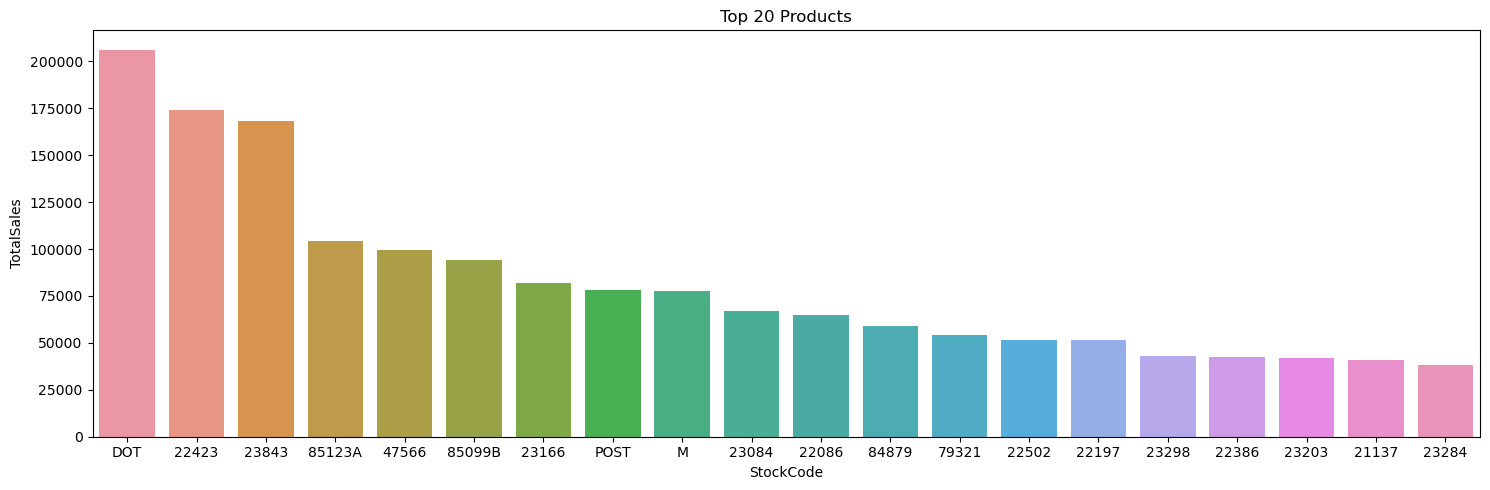

In [21]:
# top 20 items that made highest sales
stock_sales = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending= False).reset_index().head(20)

plt.figure(figsize= (15,5))
sns.barplot(x= 'StockCode', y= 'TotalSales', data= stock_sales)
plt.title('Top 20 Products')
plt.tight_layout()
plt.show()

In [22]:
# grouping invoice number and soring by sales
df.groupby('InvoiceNo').sum().sort_values(by= 'TotalSales', ascending= False)

,Quantity,UnitPrice,TotalSales
InvoiceNo,,,
581483,80995,2.08,168469.60
541431,74215,1.04,77183.60
574941,14149,498.89,52940.94
576365,13956,469.51,50653.91
556444,60,649.50,38970.00
...,...,...,...
560039,-3100,0.00,0.00
560040,3100,0.00,0.00
576369,-288,0.00,0.00


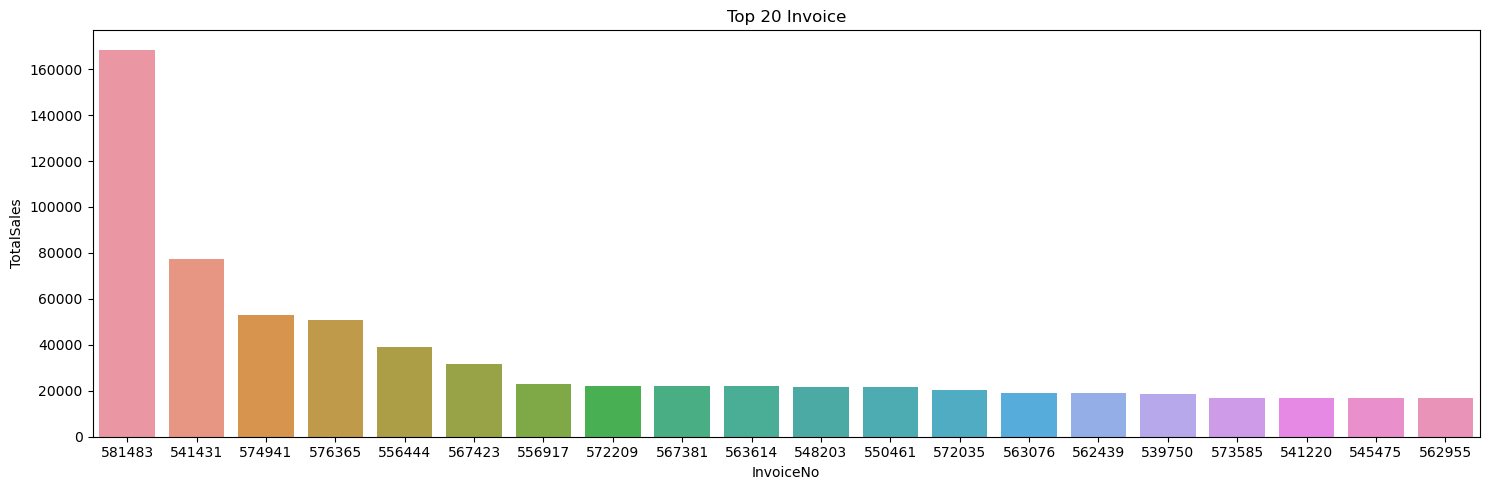

In [23]:
# top 20 invoices
invoice_sales = df.groupby('InvoiceNo')['TotalSales'].sum().sort_values(ascending= False).reset_index().head(20)

plt.figure(figsize= (15,5))
sns.barplot(x= 'InvoiceNo', y= 'TotalSales', data= invoice_sales)
plt.title('Top 20 Invoice')
plt.tight_layout()
plt.show()

In [24]:
# number of orders in each country
df['Country'].value_counts()

United Kingdom          481025
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

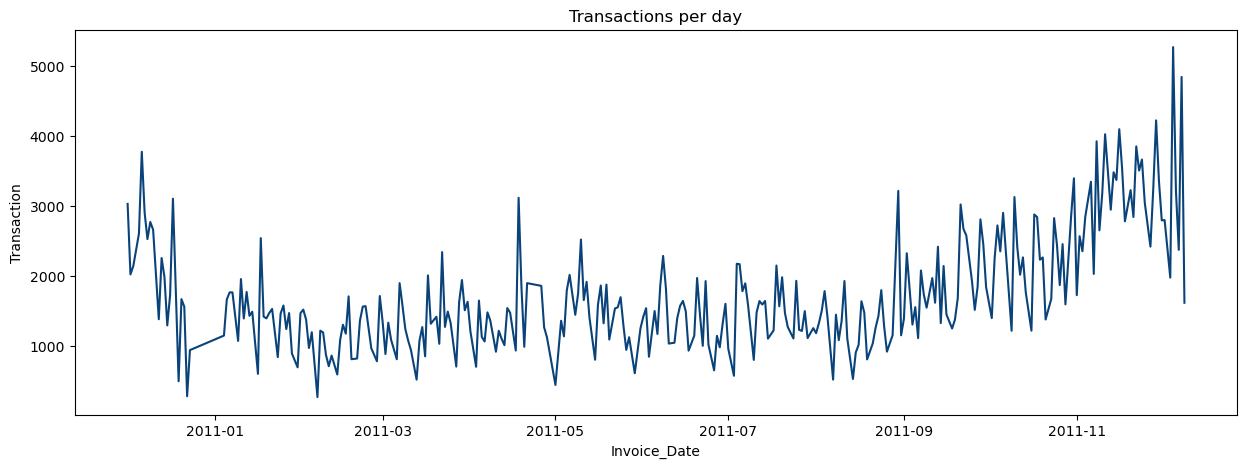

In [25]:
# number of transactions per day
num_trans_perday = df['Invoice_Date'].value_counts().reset_index().rename(columns= {'index':'Invoice_Date', 'Invoice_Date':'Transaction'})

plt.figure(figsize= (15,5))
sns.lineplot(x= 'Invoice_Date', y= 'Transaction', data= num_trans_perday, color= '#0a437a')
plt.title('Transactions per day')
plt.show()

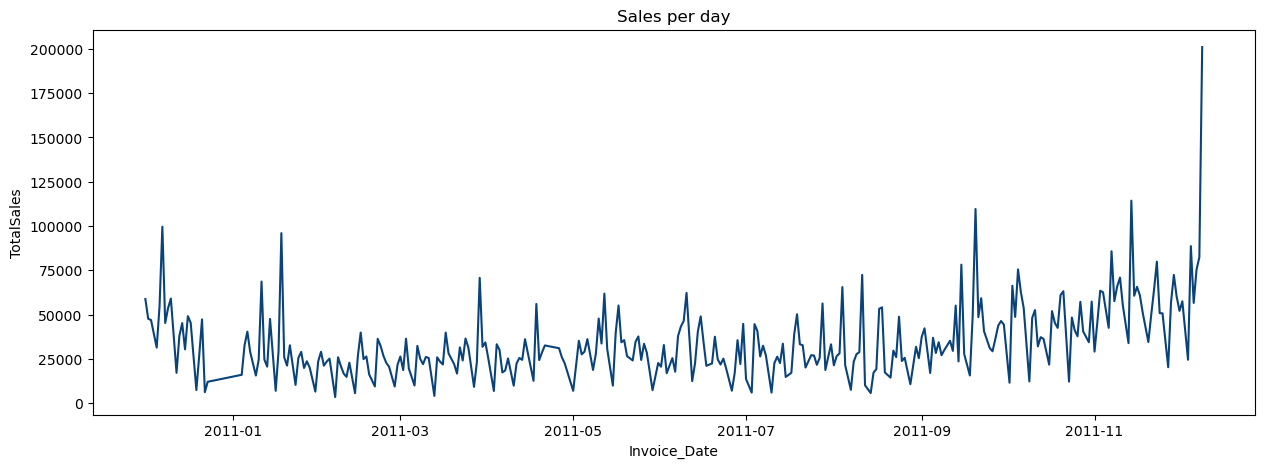

In [26]:
# sales per day
sales_perday = df.groupby('Invoice_Date')['TotalSales'].sum().reset_index()

plt.figure(figsize= (15,5))
sns.lineplot(x= 'Invoice_Date', y= 'TotalSales', data= sales_perday, color= '#0a437a')
plt.title('Sales per day')
plt.show()

### Market Basket Analysis

In [27]:
# taking germany datas
df_germany = df[df['Country'] == 'Germany']

In [28]:
# grouping and unstacking the items in each invoice in germany
df_germany_unstack = df_germany.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
df_germany_unstack

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# encoding the values with 0 and 1
def encode(x):
    
    if x <= 0:
        return 0
    
    if x > 0:
        return 1
    
basket = df_germany_unstack.applymap(encode)

In [30]:
# droping Postage
basket.drop('POSTAGE', axis= 1, inplace= True)
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# importing Apriori algorithm and Association rules
from mlxtend.frequent_patterns import apriori, association_rules 

In [32]:
# frequent items
support = apriori(basket, min_support= 0.05, use_colnames= True)
support

C:\Users\ASUS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [33]:
# generating rules
rules = association_rules(support, metric= 'lift', min_threshold= 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984,0.864580
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427,0.886524
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(PLASTERS IN TIN CIRCUS PARADE),0.157549,0.115974,0.050328,0.319444,2.754455,0.032057,1.298977,0.756070
3,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.115974,0.157549,0.050328,0.433962,2.754455,0.032057,1.488330,0.720512
4,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887,0.566070
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN CIRCUS PARADE),0.245077,0.115974,0.056893,0.232143,2.001685,0.028470,1.151290,0.662876
6,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670,0.849877
7,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.137856,0.107221,0.061269,0.444444,4.145125,0.046488,1.607002,0.880076
8,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951,0.723103
9,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006,0.633174


In [34]:
# describing support, confidence and list of itemsets
rules[['support', 'confidence', 'lift']].describe()

,support,confidence,lift
count,18.000000,18.000000,18.000000
mean,0.070508,0.489779,3.357001
std,0.023201,0.176738,1.448832
min,0.050328,0.232143,2.001685
25%,0.059081,0.348074,2.202098
50%,0.063457,0.491315,2.778116
75%,0.070022,0.563492,4.145125
max,0.131291,0.843750,6.648168


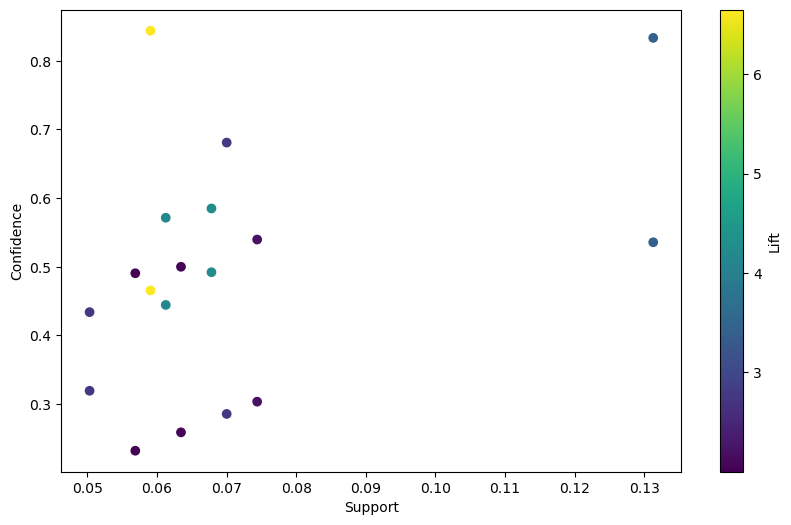

In [35]:
sup = rules['support'].values
conf = rules['confidence'].values
lift = rules['lift'].values

plt.figure(figsize= (10,6))
sc = plt.scatter(sup,conf,c= lift)
plt.colorbar(sc, label= 'Lift')

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [36]:
rules[rules['support'] > 0.1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
13,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072


In [37]:
rules[rules['confidence'] > 0.6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746,0.913551
12,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
14,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427,0.713415


In [38]:
rules[rules['lift'] > 5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.126915,0.070022,0.059081,0.465517,6.648168,0.050194,1.739959,0.973081
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746,0.913551


### Inference

1. Over 540455 transactions made in between 01/12/2010 and 09/12/2011 in this dataset.
2. The dataset contains 4223 unique shopping items.
3. Over 38 Countries are in this dataset
4. "WHITE HANGING HEART T-LIGHT HOLDER" having the highest sales frequency in United Kingdom
5. In Germany "ROUND SNACK BOXES SET OF 4 FRUITS" & "ROUND SNACK BOXES SET OF4 WOODLAND" having the highest support of 13.1% with 83.3% of confidence and lift of 3.4 times more likely to purchase.
6. "RED RETROSPOT CHARLOTTE BAG" & "WOODLAND CHARLOTTE BAG" with the highest confidence of 84.3% with 5.9% of support and having the highest lift value of 6.64 times more likely to purchase.
